In [0]:
#import necessary packages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
#import make_classification which will be used to create our dataset
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
#create x and y arrays
x,y=make_classification(n_samples=20000,n_features=10,n_informative=8,n_classes=2,weights=[0.95,0.05])
#create x and y dataframes
x=pd.DataFrame(x)
y=pd.Series(y)

In [0]:
print(x.shape)
print(y.shape)
y.groupby(y).size()

(20000, 10)
(20000,)


0    18914
1     1086
dtype: int64

In [0]:
#conduct train and test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=23)

In [0]:
#print shapes
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(15000, 10)
(5000, 10)
(15000,)
(5000,)


In [0]:
#CREATE INSTANT OF THRE MODEL
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [0]:
#FIT THE MODEL
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#predict using fitted model
predicted=log.predict(test_x)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
#IMPORT NECESSARY PACKAGES AND CREATE CLASSIFICATION_REPORT
from sklearn import metrics
print(metrics.classification_report(test_y,predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4720
           1       0.83      0.41      0.55       280

    accuracy                           0.96      5000
   macro avg       0.90      0.70      0.77      5000
weighted avg       0.96      0.96      0.96      5000



In [0]:
#FIND OUT PROBABLITY PF THE CLASSES AND PREDICTED CLASSES
predicted_prob=log.predict_proba(test_x)
predicted_prob_df=pd.DataFrame(predicted_prob)
predicted_classes_df=pd.DataFrame(predicted)
predicted_df=pd.concat([predicted_prob_df,predicted_classes_df],axis=1)
predicted_df.columns=['prob_0','prob_1','class']
predicted_df.sample(10)

,prob_0,prob_1,class
851,0.995971,0.004029,0
3029,0.989890,0.010110,0
4290,0.984352,0.015648,0
1666,0.996409,0.003591,0
206,0.993448,0.006552,0
3551,0.979918,0.020082,0
4902,0.950689,0.049311,0
2878,0.998190,0.001810,0
4113,0.965679,0.034321,0
1432,0.972986,0.027014,0


In [0]:
predicted_df.groupby('class').size()

class
0    4862
1     138
dtype: int64

In [0]:
#APPLY NEW THRESHOLD FOR OPTIMIZING PRECISION AND RECALL
new_y_test=predicted_prob[:,1]>=0.2
print(metrics.classification_report(test_y,new_y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4720
           1       0.56      0.56      0.56       280

    accuracy                           0.95      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.95      0.95      0.95      5000



In [0]:
#AUC
print("AUC")
auc=metrics.roc_auc_score(test_y,new_y_test)
auc

AUC


0.7672215496368039

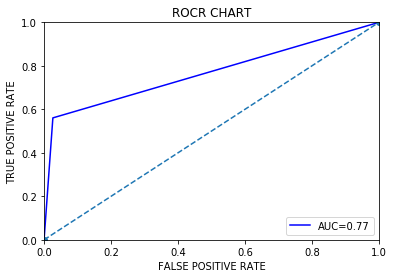

In [0]:
#ROC CHART
fpr,tpr,th=roc_curve(test_y,new_y_test)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title("ROCR CHART")
plt.plot(fpr,tpr,'b',label="AUC=%0.2F"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"o--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("TRUE POSITIVE RATE")
plt.xlabel("FALSE POSITIVE RATE")
plt.show();

CONFUSION MATRIX


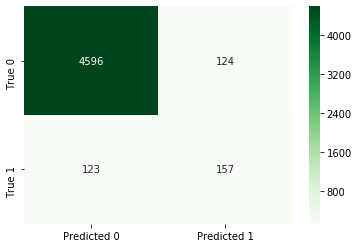

In [0]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,new_y_test)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
import seaborn as sns
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()